In [205]:
import pandas as pd
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from prophet import Prophet
import matplotlib.ticker as ticker
from prophet.diagnostics import cross_validation



In [127]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Reading CSV Data and Exporting to a Database

In [6]:
load_dotenv()
db = create_engine(os.getenv("DB_STRING"))

In [8]:
city = pd.read_csv(os.path.join('..','data','city_updated.csv'))
city

,city_id,city_name
0,42935,Isengard
1,42843,Minas Tirith
2,43125,The Shire
3,43311,Rivendell
4,42768,Mordor


In [9]:
city.to_sql('city', index = False, if_exists = 'replace', con = db)
db.dispose()

In [10]:
driver = pd.read_csv(os.path.join('..','data','driver_infos_updated.csv'))
driver

,driver_id,first_trip_date
0,650911096730027,2021-09-29
1,650910899986928,2020-01-13
2,650910868348534,2019-11-20
3,650910993187808,2021-01-07
4,650910891421704,2020-03-11
...,...,...
14349,650911141101424,2022-01-26
14350,650910974915174,2020-09-26
14351,650910957102659,2020-07-06
14352,650910881838724,2020-04-30


In [11]:
driver.to_sql('driver', index = False, if_exists = 'replace', con = db)
db.dispose()

In [13]:
marketplace = pd.read_csv(os.path.join('..','data','marketplace_updated.csv'))
marketplace

,call_date,city_id,online_duration,calls
0,2022-06-02,42935,15230520,13944
1,2022-06-18,42843,11249940,11725
2,2022-04-28,42768,9752820,9882
3,2022-04-28,42935,15099000,13430
4,2022-05-05,42768,10226520,10723
...,...,...,...,...
900,2022-01-05,42935,11943300,11774
901,2022-02-20,42935,8752800,11651
902,2022-03-12,43125,7007940,11004
903,2022-01-26,42935,11809740,12255


In [14]:
marketplace.to_sql('marketplace', index = False, if_exists = 'replace', con = db)
db.dispose()

## Job id = 14521715

In [16]:
job_aa = pd.read_csv(os.path.join('..','data', 'job_id=14521715_dir','job_id=14521715aa.csv'))
job_aa

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87984855560347,650910769305686,87960822579510,42843,2022-05-30 10:06:54.0,2022-05-30 10:25:29.0,1,1,0
1,87984863029502,633318592080111,87961170321929,43311,2022-05-30 19:49:19.0,2022-05-30 19:59:38.0,1,1,1
2,87984860095117,650910950993799,87961012420050,42843,2022-05-30 16:36:44.0,2022-05-30 16:54:54.0,1,1,1
3,87984864432948,650910816672119,87961203138613,42935,2022-05-30 21:31:11.0,2022-05-30 21:41:29.0,1,1,1
4,87984858787138,650910772807750,87960844585431,42843,2022-05-30 14:46:01.0,2022-05-30 14:59:52.0,1,1,0
...,...,...,...,...,...,...,...,...,...
892798,87982482609412,650910779080954,87961050145308,42843,2022-01-21 09:35:04.0,2022-01-21 09:51:52.0,1,1,0
892799,87982484734772,650910992840217,87960850687803,42843,2022-01-21 11:29:39.0,2022-01-21 11:48:13.0,1,1,0
892800,87982491299588,650910857428332,70368641365692,42843,2022-01-21 16:47:01.0,2022-01-21 17:14:33.0,1,1,1
892801,87982498272052,650910899912331,87961139310953,43311,2022-01-21 21:55:31.0,2022-01-21 22:23:37.0,1,1,0


In [20]:
columns_name = job_aa.columns
columns_name

Index(['order_id', 'driver_id', 'passenger_id', 'city_id', 'call_time',
       'finish_time', 'is_td_call', 'is_td_finish', 'is_dynamic'],
      dtype='object')

In [22]:
job_ab = pd.read_csv(os.path.join('..','data', 'job_id=14521715_dir','job_id=14521715ab.csv'), header=None, names = columns_name)
job_ab

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87982481532918,650910771961407,87960828979300,42843,2022-01-21 08:33:04.0,2022-01-21 08:54:47.0,1,1,0
1,87982496036710,650911122244217,87960931642826,42843,2022-01-21 20:08:59.0,2022-01-21 20:20:29.0,0,1,1
2,87983380428365,650910971931461,87960865212085,43125,2022-02-28 14:05:25.0,2022-02-28 14:21:04.0,1,1,0
3,87983388594372,633318594415675,87960833595107,43125,2022-02-28 22:38:38.0,2022-02-28 23:03:55.0,1,1,0
4,87983387037430,650911088269467,87960945233380,43311,2022-02-28 21:00:11.0,2022-02-28 21:12:25.0,1,1,0
...,...,...,...,...,...,...,...,...,...
892798,87984678686570,650911166756473,87960956585113,43311,2022-05-18 15:08:27.0,2022-05-18 15:31:16.0,0,1,0
892799,87984681227278,650911045756890,87961146840027,42843,2022-05-18 18:20:02.0,2022-05-18 18:32:19.0,1,1,1
892800,87984681569782,650910939643967,87960851752246,42768,2022-05-18 18:38:10.0,2022-05-18 18:48:17.0,1,1,1
892801,87984677442840,650911053176856,87960870155976,42935,2022-05-18 13:18:28.0,2022-05-18 13:45:52.0,1,1,0


In [25]:
job_ac = pd.read_csv(os.path.join('..','data', 'job_id=14521715_dir','job_id=14521715ac.csv'), header=None, names = columns_name)
job_ac

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87984679443780,650910772040579,87960858937211,42843,2022-05-18 16:13:09.0,2022-05-18 16:28:57.0,1,1,1
1,87984674519848,650911158041848,87960829011199,42935,2022-05-18 08:52:15.0,2022-05-18 09:09:14.0,1,1,0
2,87984676718740,650910937545445,87961141951769,43311,2022-05-18 12:15:29.0,2022-05-18 12:24:23.0,1,1,0
3,87984680792576,650910766785638,87961192951214,42935,2022-05-18 17:56:14.0,2022-05-18 18:22:52.0,1,1,0
4,87984675864958,650910821103485,87961225344332,43311,2022-05-18 10:51:47.0,2022-05-18 11:03:40.0,1,1,0
...,...,...,...,...,...,...,...,...,...
892798,87983743731078,650910771578649,87960849320117,42935,2022-03-19 21:43:13.0,2022-03-19 21:50:30.0,1,1,1
892799,87983737636216,650910881972495,87960871418758,42935,2022-03-19 15:59:40.0,2022-03-19 16:16:50.0,1,1,1
892800,87983735838892,650910856582643,87960874107152,43311,2022-03-19 14:02:16.0,2022-03-19 14:23:06.0,0,1,0
892801,87983731459455,650911022862065,87960889727005,42843,2022-03-19 08:19:55.0,2022-03-19 08:34:42.0,1,1,0


In [26]:
job_ad = pd.read_csv(os.path.join('..','data', 'job_id=14521715_dir','job_id=14521715ad.csv'), header=None, names = columns_name)
job_ad

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87983738368687,650910808442337,87961084454266,43125,2022-03-19 16:48:47.0,2022-03-19 16:58:48.0,1,1,1
1,87983733760030,650911160416550,87961202348071,42768,2022-03-19 11:38:20.0,2022-03-19 11:48:45.0,1,1,0
2,87983744081904,650910970743079,87960818516253,42768,2022-03-19 21:56:39.0,2022-03-19 22:15:37.0,1,1,0
3,87983740548806,633318595786464,87960810375268,42935,2022-03-19 19:02:50.0,2022-03-19 19:13:14.0,1,1,0
4,87983735009080,650910948298155,87960866537984,43125,2022-03-19 13:07:23.0,2022-03-19 13:22:11.0,1,1,1
...,...,...,...,...,...,...,...,...,...
892798,87982079076348,650910902177550,87960968592562,42935,2022-01-02 18:00:53.0,2022-01-02 18:17:54.0,1,1,1
892799,87982072289978,650911085015464,87961115471373,42935,2022-01-02 10:14:52.0,2022-01-02 10:35:00.0,1,1,1
892800,87982072809863,650910911120996,87960866469958,42843,2022-01-02 11:08:39.0,2022-01-02 11:27:16.0,1,1,0
892801,87984453358730,650911162461239,87961143695508,42768,2022-05-04 20:52:50.0,2022-05-04 21:03:11.0,1,1,0


In [28]:
job_ae = pd.read_csv(os.path.join('..','data', 'job_id=14521715_dir','job_id=14521715ae.csv'), header=None, names = columns_name)
job_ae

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87984443182868,650910995188814,87961114428616,42768,2022-05-04 09:08:05.0,2022-05-04 09:19:27.0,1,1,0
1,87984445670917,650910786032024,87960826079320,42843,2022-05-04 12:22:59.0,2022-05-04 12:46:32.0,1,1,0
2,87984451824675,650911170203904,87960831527844,42935,2022-05-04 19:27:39.0,2022-05-04 19:42:12.0,1,1,1
3,87985028861184,650910794793049,87960847090273,43125,2022-06-10 15:51:09.0,2022-06-10 15:59:30.0,1,1,0
4,87985020602280,650911163536175,87961029335157,42935,2022-06-10 00:30:26.0,2022-06-10 00:48:45.0,1,1,1
...,...,...,...,...,...,...,...,...,...
892798,87983847713698,650910844363701,87960821287524,42843,2022-03-26 16:07:27.0,2022-03-26 16:16:54.0,1,1,0
892799,87983844579490,650910909789671,87961022532964,43125,2022-03-26 12:04:19.0,2022-03-26 12:22:18.0,1,1,1
892800,87983843713789,650911159760828,87961210656127,43311,2022-03-26 10:52:23.0,2022-03-26 11:02:21.0,1,1,0
892801,87983846914197,650911033122690,87960859977979,42935,2022-03-26 15:00:43.0,2022-03-26 15:17:26.0,1,1,0


In [29]:
job_af = pd.read_csv(os.path.join('..','data', 'job_id=14521715_dir','job_id=14521715af.csv'), header=None, names = columns_name)
job_af

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87983848479931,650911073545310,87960827032827,42935,2022-03-26 16:59:39.0,2022-03-26 17:12:28.0,1,1,1
1,87983844851010,650911098907592,87960839324592,42935,2022-03-26 12:39:07.0,2022-03-26 12:55:46.0,1,1,1
2,87983848600792,650911086088465,87961181929530,42843,2022-03-26 17:03:14.0,2022-03-26 17:16:25.0,0,1,0
3,87983854434684,650911137221099,87960947305231,42768,2022-03-26 22:40:48.0,2022-03-26 23:03:46.0,1,1,0
4,87983854551360,650910814722723,87960873663327,42935,2022-03-26 22:43:30.0,2022-03-26 23:08:48.0,1,1,1
...,...,...,...,...,...,...,...,...,...
892798,87982554401427,650911105911415,87960842044290,42935,2022-01-24 12:21:57.0,2022-01-24 12:31:58.0,0,1,1
892799,87982559611653,650911062178151,87961187369562,42843,2022-01-24 16:51:45.0,2022-01-24 17:27:08.0,1,1,0
892800,87982560036526,650910944020585,87961025750160,42768,2022-01-24 17:10:11.0,2022-01-24 17:16:48.0,1,1,0
892801,87982549437245,633318596381678,87961043532841,42935,2022-01-24 07:37:49.0,2022-01-24 08:06:02.0,1,1,1


In [30]:
job_ag = pd.read_csv(os.path.join('..','data', 'job_id=14521715_dir','job_id=14521715ag.csv'), header=None, names = columns_name)
job_ag

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87982559603749,650910845802856,87961159998251,43125,2022-01-24 16:49:10.0,2022-01-24 16:57:20.0,1,1,0
1,87982564899891,650910846110575,87960883803654,43311,2022-01-24 21:51:02.0,2022-01-24 22:11:56.0,1,1,0
2,87982550314212,650910915156750,87960866533065,43125,2022-01-24 08:32:18.0,2022-01-24 08:47:50.0,1,1,1
3,87982559442028,650910842612189,87960835415225,42843,2022-01-24 16:38:59.0,2022-01-24 16:46:43.0,1,1,0
4,87982560455856,650911108892684,87960969683445,42768,2022-01-24 17:31:32.0,2022-01-24 17:44:22.0,1,1,0
...,...,...,...,...,...,...,...,...,...
892798,87983552362585,650911024492846,87961067077576,42768,2022-03-09 09:20:42.0,2022-03-09 09:41:29.0,1,1,0
892799,87983555084092,650911122337892,87961117093636,42768,2022-03-09 12:30:57.0,2022-03-09 12:49:14.0,1,1,0
892800,87983557261672,650911085396171,87960822007176,42843,2022-03-09 14:45:09.0,2022-03-09 15:14:28.0,0,1,0
892801,87983561703031,650910993523886,87960862403108,43125,2022-03-09 19:14:04.0,2022-03-09 19:40:39.0,0,1,1


In [31]:
job_ah = pd.read_csv(os.path.join('..','data', 'job_id=14521715_dir','job_id=14521715ah.csv'), header=None, names = columns_name)
job_ah

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87983558775340,650911011181925,87960872384308,42843,2022-03-09 16:26:52.0,2022-03-09 16:43:15.0,1,1,0
1,87983562522194,650911152338158,87960877252653,43311,2022-03-09 20:01:13.0,2022-03-09 20:07:30.0,1,1,1
2,87983556939420,650911017846158,87960962333961,42935,2022-03-09 14:18:24.0,2022-03-09 14:59:05.0,1,1,0
3,87983558035077,650910812349559,87960817223521,43311,2022-03-09 15:40:59.0,2022-03-09 15:53:03.0,1,1,0
4,87983556835405,650910905140013,87961094319654,42768,2022-03-09 14:19:18.0,2022-03-09 14:26:39.0,1,1,0
...,...,...,...,...,...,...,...,...,...
892798,87983988114235,650911003490774,87960954894221,42935,2022-04-04 07:24:25.0,2022-04-04 07:52:40.0,1,1,1
892799,87982176755711,650911049434657,87961128328468,42935,2022-01-07 12:18:51.0,2022-01-07 12:29:51.0,1,1,1
892800,87982188751759,650910800222124,87960870523143,43125,2022-01-07 20:55:05.0,2022-01-07 21:16:15.0,1,1,0
892801,87982172758161,650910996907380,87961179414770,43311,2022-01-07 08:43:33.0,2022-01-07 08:58:20.0,1,1,1


In [32]:
job_ai = pd.read_csv(os.path.join('..','data', 'job_id=14521715_dir','job_id=14521715ai.csv'), header=None, names = columns_name)
job_ai

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87982177227934,650911028887813,87960994779076,43311,2022-01-07 12:44:25.0,2022-01-07 12:59:47.0,1,1,1
1,87982178914051,650911049823652,87960862582702,43125,2022-01-07 14:01:55.0,2022-01-07 14:14:44.0,1,1,1
2,87982179894203,650910785365585,87961025205612,42935,2022-01-07 14:48:12.0,2022-01-07 15:03:22.0,1,1,0


In [34]:
jobs_list = [job_aa, job_ab, job_ac, job_ad, job_ae, job_af, job_ag, job_ah, job_ai]
for job in jobs_list:
    job.to_sql('job', index = False, if_exists= 'append', con = db)
    db.dispose()    

# Reading Tables from Database

In [7]:
city = pd.read_sql('city', con = db)
db.dispose()
city

,city_id,city_name
0,42935,Isengard
1,42843,Minas Tirith
2,43125,The Shire
3,43311,Rivendell
4,42768,Mordor


In [8]:
driver = pd.read_sql('driver', con = db)
db.dispose()
driver

,driver_id,first_trip_date
0,650911096730027,2021-09-29
1,650910899986928,2020-01-13
2,650910868348534,2019-11-20
3,650910993187808,2021-01-07
4,650910891421704,2020-03-11
...,...,...
14349,650911141101424,2022-01-26
14350,650910974915174,2020-09-26
14351,650910957102659,2020-07-06
14352,650910881838724,2020-04-30


In [9]:
marketplace = pd.read_sql('marketplace', con = db)
db.dispose()
marketplace

,call_date,city_id,online_duration,calls
0,2022-06-02,42935,15230520,13944
1,2022-06-18,42843,11249940,11725
2,2022-04-28,42768,9752820,9882
3,2022-04-28,42935,15099000,13430
4,2022-05-05,42768,10226520,10723
...,...,...,...,...
900,2022-01-05,42935,11943300,11774
901,2022-02-20,42935,8752800,11651
902,2022-03-12,43125,7007940,11004
903,2022-01-26,42935,11809740,12255


In [10]:
job = pd.read_sql('job', con = db)
db.dispose()
job

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87984855560347,650910769305686,87960822579510,42843,2022-05-30 10:06:54.0,2022-05-30 10:25:29.0,1,1,0
1,87984863029502,633318592080111,87961170321929,43311,2022-05-30 19:49:19.0,2022-05-30 19:59:38.0,1,1,1
2,87984860095117,650910950993799,87961012420050,42843,2022-05-30 16:36:44.0,2022-05-30 16:54:54.0,1,1,1
3,87984864432948,650910816672119,87961203138613,42935,2022-05-30 21:31:11.0,2022-05-30 21:41:29.0,1,1,1
4,87984858787138,650910772807750,87960844585431,42843,2022-05-30 14:46:01.0,2022-05-30 14:59:52.0,1,1,0
...,...,...,...,...,...,...,...,...,...
7142422,87982172758161,650910996907380,87961179414770,43311,2022-01-07 08:43:33.0,2022-01-07 08:58:20.0,1,1,1
7142423,87982182890714,650911042071116,87961147794597,42768,2022-01-07 17:01:40.0,2022-01-07 17:15:29.0,0,1,0
7142424,87982177227934,650911028887813,87960994779076,43311,2022-01-07 12:44:25.0,2022-01-07 12:59:47.0,1,1,1
7142425,87982178914051,650911049823652,87960862582702,43125,2022-01-07 14:01:55.0,2022-01-07 14:14:44.0,1,1,1


# 1) Did the company achieve both OKRs by june? What were the causes for this? Is there any segment of driver or passenger or city that is critical so the company could focus strategies for next months?

## OKR-1 - A) By the end of June: have a total sum of 7,2MM finished trips

In [11]:
# Visualizing dataframe informations
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7142427 entries, 0 to 7142426
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      int64 
 1   driver_id     int64 
 2   passenger_id  int64 
 3   city_id       int64 
 4   call_time     object
 5   finish_time   object
 6   is_td_call    int64 
 7   is_td_finish  int64 
 8   is_dynamic    int64 
dtypes: int64(7), object(2)
memory usage: 490.4+ MB


In [12]:
# Converting the object column to datetime
job['call_time'] = pd.to_datetime(job['call_time'])
job

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
0,87984855560347,650910769305686,87960822579510,42843,2022-05-30 10:06:54,2022-05-30 10:25:29.0,1,1,0
1,87984863029502,633318592080111,87961170321929,43311,2022-05-30 19:49:19,2022-05-30 19:59:38.0,1,1,1
2,87984860095117,650910950993799,87961012420050,42843,2022-05-30 16:36:44,2022-05-30 16:54:54.0,1,1,1
3,87984864432948,650910816672119,87961203138613,42935,2022-05-30 21:31:11,2022-05-30 21:41:29.0,1,1,1
4,87984858787138,650910772807750,87960844585431,42843,2022-05-30 14:46:01,2022-05-30 14:59:52.0,1,1,0
...,...,...,...,...,...,...,...,...,...
7142422,87982172758161,650910996907380,87961179414770,43311,2022-01-07 08:43:33,2022-01-07 08:58:20.0,1,1,1
7142423,87982182890714,650911042071116,87961147794597,42768,2022-01-07 17:01:40,2022-01-07 17:15:29.0,0,1,0
7142424,87982177227934,650911028887813,87960994779076,43311,2022-01-07 12:44:25,2022-01-07 12:59:47.0,1,1,1
7142425,87982178914051,650911049823652,87960862582702,43125,2022-01-07 14:01:55,2022-01-07 14:14:44.0,1,1,1


In [13]:
#Verifying if there are any orders that were completed after the end of June
job.sort_values("finish_time") 

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic
1812757,87982047279321,650911121248285,87961004305353,42768,2022-01-01 00:00:09,2022-01-01 00:07:01.0,1,1,1
4058077,87982047242167,650911078164747,87961004799154,43311,2022-01-01 00:00:29,2022-01-01 00:08:37.0,1,1,1
3357789,87982047299239,650910767373469,87960990866540,43311,2022-01-01 00:01:55,2022-01-01 00:09:04.0,1,1,1
1050686,87982047261447,650910898158361,87961151013747,42768,2022-01-01 00:00:35,2022-01-01 00:09:29.0,0,1,1
4745812,87982047279758,650910784945689,87960850684538,42843,2022-01-01 00:01:09,2022-01-01 00:10:37.0,1,1,1
...,...,...,...,...,...,...,...,...,...
4786459,87985337769211,650910810093007,87960966195999,43125,2022-06-30 23:28:27,2022-06-30 23:59:20.0,0,1,0
1368889,87985338004096,650910767959688,87960954416865,43125,2022-06-30 23:48:23,2022-06-30 23:59:28.0,0,1,1
3220615,87985337850122,650910970327698,87961115310150,42768,2022-06-30 23:37:08,2022-06-30 23:59:35.0,1,1,0
3797619,87985337927052,650910963838783,87961199615068,42843,2022-06-30 23:44:03,2022-06-30 23:59:41.0,1,1,1


In [14]:
job["is_td_finish"].value_counts()

is_td_finish
1    7142427
Name: count, dtype: int64

In [15]:
# Verifying if there are any repeated rows by order_id
job['order_id'].value_counts()

order_id
87984855560347    1
87983375058921    1
87983801584232    1
87983732587235    1
87983735268194    1
                 ..
87984306501662    1
87984305559502    1
87984309118059    1
87984306492748    1
87982179894203    1
Name: count, Length: 7142427, dtype: int64

In [16]:
# Counting the number of finished trips
job['order_id'].count()

7142427

#### As of the end of June, there were 7,142,427 finished trips, so the first OKR to reach a total of 7.2 million finished trips by the end of June was not achieved

## OKR-2 - B) By the end of June: 4,16 considering total sum of calls and supply hours

In [17]:
marketplace

,call_date,city_id,online_duration,calls
0,2022-06-02,42935,15230520,13944
1,2022-06-18,42843,11249940,11725
2,2022-04-28,42768,9752820,9882
3,2022-04-28,42935,15099000,13430
4,2022-05-05,42768,10226520,10723
...,...,...,...,...
900,2022-01-05,42935,11943300,11774
901,2022-02-20,42935,8752800,11651
902,2022-03-12,43125,7007940,11004
903,2022-01-26,42935,11809740,12255


In [18]:
# sorting the dataframe to verify call dates
marketplace = marketplace.sort_values('call_date')
marketplace

,call_date,city_id,online_duration,calls
820,2022-01-01,42768,2927640,5180
450,2022-01-01,42843,5442240,10847
710,2022-01-01,42935,4737900,9425
786,2022-01-01,43125,2886540,6476
640,2022-01-01,43311,5994960,13125
...,...,...,...,...
491,2022-06-30,42935,16629120,13622
746,2022-06-30,42843,12488160,11650
794,2022-06-30,42768,9681180,9266
747,2022-06-30,43311,12060360,11834


In [19]:
# creating new column (online_duration_hour) based on online_duration (secs) column 
marketplace['online_duration_hour'] = marketplace['online_duration'] / 3600
marketplace

,call_date,city_id,online_duration,calls,online_duration_hour
820,2022-01-01,42768,2927640,5180,813.233333
450,2022-01-01,42843,5442240,10847,1511.733333
710,2022-01-01,42935,4737900,9425,1316.083333
786,2022-01-01,43125,2886540,6476,801.816667
640,2022-01-01,43311,5994960,13125,1665.266667
...,...,...,...,...,...
491,2022-06-30,42935,16629120,13622,4619.200000
746,2022-06-30,42843,12488160,11650,3468.933333
794,2022-06-30,42768,9681180,9266,2689.216667
747,2022-06-30,43311,12060360,11834,3350.100000


In [20]:
sum(marketplace['calls'])

10503958

In [21]:
DSR = sum(marketplace['calls']) / sum(marketplace['online_duration_hour'])
DSR

4.047962068008194

#### As of the end of June, the DSR was approximately 4,05, so the second OKR to reach a DSR of 4,16 by the end of June was not achieved

#### Analyzing the indicators of completed trips and DSR, it is found that possible causes for the company not achieving the June OKRs are the lower number of calls from passengers and the higher amount of time that drivers remain online to start a trip, which may be associated with a lower than desired performance of the application, causing delays in starting a trip and a lower number of completed trips.

In [22]:
# Grouping by city
marketplace_grouped = marketplace.groupby(['city_id']).sum()
marketplace_grouped

,call_date,online_duration,calls,online_duration_hour
city_id,,,,
42768,2022-01-012022-01-022022-01-032022-01-042022-0...,1599536160,1767834,444315.600000
42843,2022-01-012022-01-022022-01-032022-01-042022-0...,2072396640,2303205,575665.733333
42935,2022-01-012022-01-022022-01-032022-01-042022-0...,2474365740,2602355,687323.816667
43125,2022-01-012022-01-022022-01-032022-01-042022-0...,1300732200,1658284,361314.500000
43311,2022-01-012022-01-022022-01-032022-01-042022-0...,1894521420,2172280,526255.950000


In [23]:
# Analyzing cities' DSRs 
marketplace_grouped['dsr'] = marketplace_grouped['calls'] / marketplace_grouped['online_duration_hour']
marketplace_grouped

,call_date,online_duration,calls,online_duration_hour,dsr
city_id,,,,,
42768,2022-01-012022-01-022022-01-032022-01-042022-0...,1599536160,1767834,444315.600000,3.978780
42843,2022-01-012022-01-022022-01-032022-01-042022-0...,2072396640,2303205,575665.733333,4.000942
42935,2022-01-012022-01-022022-01-032022-01-042022-0...,2474365740,2602355,687323.816667,3.786214
43125,2022-01-012022-01-022022-01-032022-01-042022-0...,1300732200,1658284,361314.500000,4.589586
43311,2022-01-012022-01-022022-01-032022-01-042022-0...,1894521420,2172280,526255.950000,4.127801


In [24]:
marketplace_grouped = marketplace_grouped.reset_index()
marketplace_grouped

,city_id,call_date,online_duration,calls,online_duration_hour,dsr
0,42768,2022-01-012022-01-022022-01-032022-01-042022-0...,1599536160,1767834,444315.600000,3.978780
1,42843,2022-01-012022-01-022022-01-032022-01-042022-0...,2072396640,2303205,575665.733333,4.000942
2,42935,2022-01-012022-01-022022-01-032022-01-042022-0...,2474365740,2602355,687323.816667,3.786214
3,43125,2022-01-012022-01-022022-01-032022-01-042022-0...,1300732200,1658284,361314.500000,4.589586
4,43311,2022-01-012022-01-022022-01-032022-01-042022-0...,1894521420,2172280,526255.950000,4.127801


In [25]:
# merging to analyze the indicators with cities' names 
city_marketplace = city.merge(marketplace_grouped, how = 'inner', on = 'city_id') 
city_marketplace

,city_id,city_name,call_date,online_duration,calls,online_duration_hour,dsr
0,42935,Isengard,2022-01-012022-01-022022-01-032022-01-042022-0...,2474365740,2602355,687323.816667,3.786214
1,42843,Minas Tirith,2022-01-012022-01-022022-01-032022-01-042022-0...,2072396640,2303205,575665.733333,4.000942
2,43125,The Shire,2022-01-012022-01-022022-01-032022-01-042022-0...,1300732200,1658284,361314.500000,4.589586
3,43311,Rivendell,2022-01-012022-01-022022-01-032022-01-042022-0...,1894521420,2172280,526255.950000,4.127801
4,42768,Mordor,2022-01-012022-01-022022-01-032022-01-042022-0...,1599536160,1767834,444315.600000,3.978780


In [26]:
job_driver = job.merge(driver, on = 'driver_id', how = 'inner')
job_driver

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic,first_trip_date
0,87984855560347,650910769305686,87960822579510,42843,2022-05-30 10:06:54,2022-05-30 10:25:29.0,1,1,0,2019-06-11
1,87984428870138,650910769305686,87961169250050,42843,2022-05-03 09:33:48,2022-05-03 09:48:31.0,1,1,0,2019-06-11
2,87984430443875,650910769305686,87960890737836,42843,2022-05-03 11:53:38,2022-05-03 12:16:44.0,0,1,0,2019-06-11
3,87984178380383,650910769305686,87960859353014,42843,2022-04-16 07:02:21,2022-04-16 07:19:56.0,1,1,0,2019-06-11
4,87984223392027,650910769305686,87960863726029,42843,2022-04-19 12:16:09,2022-04-19 12:40:49.0,1,1,0,2019-06-11
...,...,...,...,...,...,...,...,...,...,...
7142422,87982559202727,650910818291629,87960850762243,43311,2022-01-24 16:29:16,2022-01-24 16:31:58.0,1,1,0,2020-01-03
7142423,87983721461455,650911029118299,87960889220954,43311,2022-03-18 18:50:53,2022-03-18 19:01:20.0,1,1,0,2022-03-18
7142424,87982593876027,650910832754855,87961020906148,43311,2022-01-26 11:22:06,2022-01-26 11:42:18.0,1,1,0,2020-03-31
7142425,87983954220974,650910923733614,87961109271050,42935,2022-04-02 10:39:13,2022-04-02 10:48:31.0,1,1,0,2020-08-21


In [27]:
job_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7142427 entries, 0 to 7142426
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   order_id         int64         
 1   driver_id        int64         
 2   passenger_id     int64         
 3   city_id          int64         
 4   call_time        datetime64[ns]
 5   finish_time      object        
 6   is_td_call       int64         
 7   is_td_finish     int64         
 8   is_dynamic       int64         
 9   first_trip_date  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 544.9+ MB


In [28]:
job_driver['first_trip_date'] = pd.to_datetime(job_driver['first_trip_date'])
job_driver['first_trip_month'] = job_driver['first_trip_date'].dt.to_period('M').dt.to_timestamp()
job_driver

,order_id,driver_id,passenger_id,city_id,call_time,finish_time,is_td_call,is_td_finish,is_dynamic,first_trip_date,first_trip_month
0,87984855560347,650910769305686,87960822579510,42843,2022-05-30 10:06:54,2022-05-30 10:25:29.0,1,1,0,2019-06-11,2019-06-01
1,87984428870138,650910769305686,87961169250050,42843,2022-05-03 09:33:48,2022-05-03 09:48:31.0,1,1,0,2019-06-11,2019-06-01
2,87984430443875,650910769305686,87960890737836,42843,2022-05-03 11:53:38,2022-05-03 12:16:44.0,0,1,0,2019-06-11,2019-06-01
3,87984178380383,650910769305686,87960859353014,42843,2022-04-16 07:02:21,2022-04-16 07:19:56.0,1,1,0,2019-06-11,2019-06-01
4,87984223392027,650910769305686,87960863726029,42843,2022-04-19 12:16:09,2022-04-19 12:40:49.0,1,1,0,2019-06-11,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...
7142422,87982559202727,650910818291629,87960850762243,43311,2022-01-24 16:29:16,2022-01-24 16:31:58.0,1,1,0,2020-01-03,2020-01-01
7142423,87983721461455,650911029118299,87960889220954,43311,2022-03-18 18:50:53,2022-03-18 19:01:20.0,1,1,0,2022-03-18,2022-03-01
7142424,87982593876027,650910832754855,87961020906148,43311,2022-01-26 11:22:06,2022-01-26 11:42:18.0,1,1,0,2020-03-31,2020-03-01
7142425,87983954220974,650910923733614,87961109271050,42935,2022-04-02 10:39:13,2022-04-02 10:48:31.0,1,1,0,2020-08-21,2020-08-01


In [29]:
job_driver_count = job_driver.groupby('first_trip_month').agg({
    'driver_id': pd.Series.nunique,
    'order_id': 'count'
    }).reset_index()
job_driver_count.rename(columns = {'order_id':'count_orders', 'driver_id': 'qt_drivers'}, inplace = True)
job_driver_count

,first_trip_month,qt_drivers,count_orders
0,2017-08-01,2,19
1,2017-09-01,15,5367
2,2017-10-01,6,3047
3,2017-11-01,9,5319
4,2017-12-01,49,29738
5,2018-01-01,84,50228
6,2018-02-01,89,55468
7,2018-03-01,54,22180
8,2018-04-01,32,17982
9,2018-05-01,41,17190


In [30]:
job_driver_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_trip_month  59 non-null     datetime64[ns]
 1   qt_drivers        59 non-null     int64         
 2   count_orders      59 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.5 KB


In [31]:
# Visualizing the number of months since the drivers did their first trip
job_driver_count['qt_months'] = (((pd.Timestamp('2022-06-01') - job_driver_count['first_trip_month']).dt.days / 30.44)+1).astype(int)
job_driver_count

,first_trip_month,qt_drivers,count_orders,qt_months
0,2017-08-01,2,19,58
1,2017-09-01,15,5367,57
2,2017-10-01,6,3047,56
3,2017-11-01,9,5319,55
4,2017-12-01,49,29738,54
5,2018-01-01,84,50228,53
6,2018-02-01,89,55468,52
7,2018-03-01,54,22180,52
8,2018-04-01,32,17982,51
9,2018-05-01,41,17190,50


In [32]:
# Adjusting the number of months to see how many months of registration they have within the months listed in the dataframe
job_driver_count.loc[job_driver_count['qt_months'] > 6, 'qt_months'] = 6
job_driver_count

,first_trip_month,qt_drivers,count_orders,qt_months
0,2017-08-01,2,19,6
1,2017-09-01,15,5367,6
2,2017-10-01,6,3047,6
3,2017-11-01,9,5319,6
4,2017-12-01,49,29738,6
5,2018-01-01,84,50228,6
6,2018-02-01,89,55468,6
7,2018-03-01,54,22180,6
8,2018-04-01,32,17982,6
9,2018-05-01,41,17190,6


In [33]:
# calculating the number of trips per number of drivers and number of months since their first trip
job_driver_count['orders_drive_month'] = job_driver_count['count_orders'] / (job_driver_count['qt_drivers'] * job_driver_count['qt_months'])
job_driver_count

,first_trip_month,qt_drivers,count_orders,qt_months,orders_drive_month
0,2017-08-01,2,19,6,1.583333
1,2017-09-01,15,5367,6,59.633333
2,2017-10-01,6,3047,6,84.638889
3,2017-11-01,9,5319,6,98.500000
4,2017-12-01,49,29738,6,101.149660
5,2018-01-01,84,50228,6,99.658730
6,2018-02-01,89,55468,6,103.872659
7,2018-03-01,54,22180,6,68.456790
8,2018-04-01,32,17982,6,93.656250
9,2018-05-01,41,17190,6,69.878049


In [34]:
# sorting the dataframe to see the most critical segment of driver per first trip month
job_driver_count.sort_values('orders_drive_month')

,first_trip_month,qt_drivers,count_orders,qt_months,orders_drive_month
0,2017-08-01,2,19,6,1.583333
1,2017-09-01,15,5367,6,59.633333
7,2018-03-01,54,22180,6,68.456790
25,2019-09-01,340,141977,6,69.596569
9,2018-05-01,41,17190,6,69.878049
24,2019-08-01,439,189844,6,72.074412
52,2021-12-01,464,201037,6,72.211566
48,2021-08-01,255,116689,6,76.267320
26,2019-10-01,389,178867,6,76.635390
27,2019-11-01,326,155274,6,79.383436


#### Analyzing the number of completed trips per drivers grouped by their start month and the number of months since the driver's first trip, it can be observed that the company should focus on implementing strategies targeting drivers who have been using the app for a longer period of time, as they are the critical audience

# 2) Using statistical methods and based on the given dataset for the first semester, will the company achieve OKR-1 on december? Explain the forecast results, the errors, the confidence level, and give at least 2 suggestions to improve the results for the next 6 months.

## B) By the end of December: have a total sum of 16,5MM finished trips

In [74]:
job['call_time'] = pd.to_datetime(job['call_time'])
job['call_date'] = job['call_time'].dt.date

# Group by day and count the rows
grouped_job = job.groupby('call_date').count()['order_id'].reset_index()
grouped_job = grouped_job.rename(columns = {'order_id':'finished_trips'})

# Visualizing results
grouped_job

,call_date,finished_trips
0,2022-01-01,15575
1,2022-01-02,18964
2,2022-01-03,30587
3,2022-01-04,34214
4,2022-01-05,36746
...,...,...
176,2022-06-26,24430
177,2022-06-27,36574
178,2022-06-28,38315
179,2022-06-29,38959


In [75]:
grouped_job = grouped_job.sort_values('call_date')
grouped_job

,call_date,finished_trips
0,2022-01-01,15575
1,2022-01-02,18964
2,2022-01-03,30587
3,2022-01-04,34214
4,2022-01-05,36746
...,...,...
176,2022-06-26,24430
177,2022-06-27,36574
178,2022-06-28,38315
179,2022-06-29,38959


In [76]:
grouped_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   call_date       181 non-null    object
 1   finished_trips  181 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [77]:
# Convert the call_date column to a date object
grouped_job['call_date'] = pd.to_datetime(grouped_job['call_date'])

In [78]:
# Checking for missing values
grouped_job.isna().sum()

call_date         0
finished_trips    0
dtype: int64

In [79]:
# Calculating summary statistics
grouped_job.describe()

,call_date,finished_trips
count,181,181.000000
mean,2022-04-01 00:00:00,39460.922652
min,2022-01-01 00:00:00,15575.000000
25%,2022-02-15 00:00:00,37806.000000
50%,2022-04-01 00:00:00,40561.000000
75%,2022-05-16 00:00:00,43719.000000
max,2022-06-30 00:00:00,59861.000000
std,NaN,7529.390876


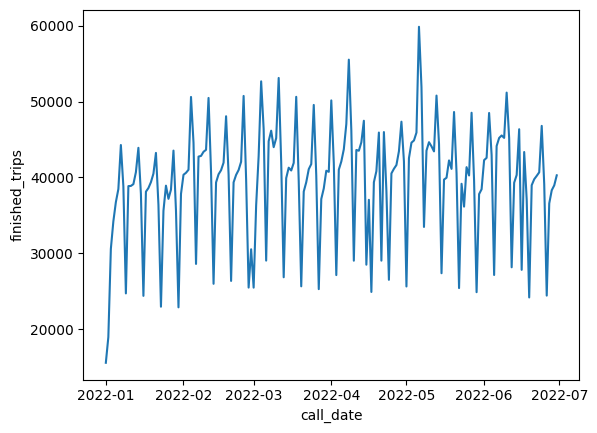

In [80]:
# Visualizing the data using a line plot
sns.lineplot(x='call_date', y='finished_trips', data=grouped_job)
plt.show()

In [81]:
# Testing for significant differences between the mean values of finished trips in January and June using a t-test
jan_data = grouped_job[grouped_job['call_date'].dt.month == 1]['finished_trips']
jun_data = grouped_job[grouped_job['call_date'].dt.month == 6]['finished_trips']

ttest_result = ttest_ind(jan_data, jun_data)

print(f"T-test result: statistic = {ttest_result.statistic}, p-value = {ttest_result.pvalue}")


T-test result: statistic = -2.3425593403336107, p-value = 0.022544922591762176


#### Since the p-value was less than 0.05, we can conclude that there is a significant difference between the first and the last month of finished trips

09:16:22 - cmdstanpy - INFO - Chain [1] start processing
09:16:22 - cmdstanpy - INFO - Chain [1] done processing


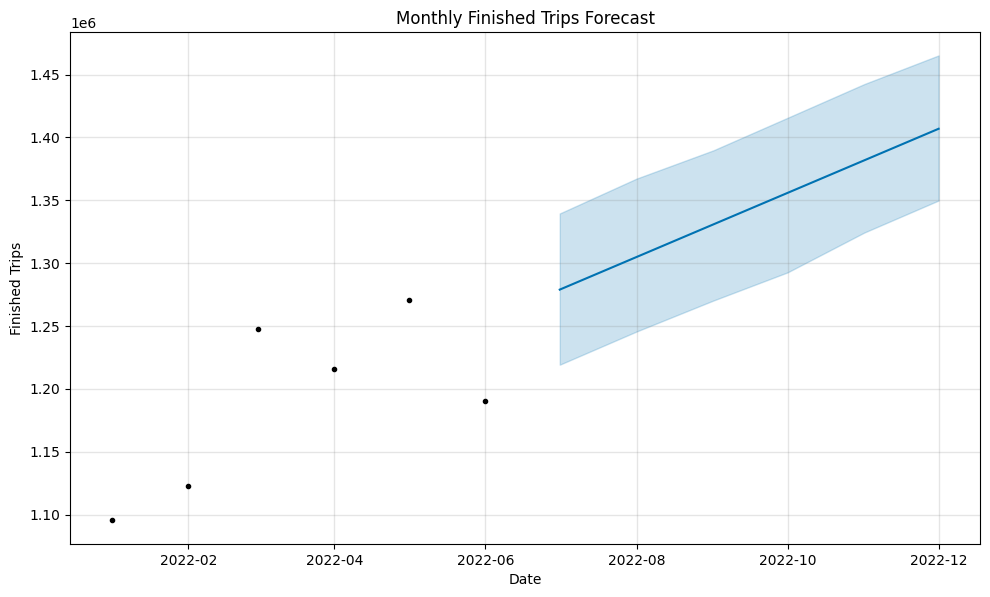

In [117]:
grouped_job_indexed = grouped_job.set_index('call_date')

grouped_job_indexed = grouped_job_indexed.resample('MS').sum()

prophet_data = pd.DataFrame({'ds': grouped_job_indexed.index, 'y': grouped_job_indexed.finished_trips.values})

model = Prophet()
model.fit(prophet_data)

future_dates = pd.date_range(start='2022-07-01', end='2022-12-31', freq='MS')
future_data = pd.DataFrame({'ds': future_dates})

forecast = model.predict(future_data)

model.plot(forecast, xlabel='Date', ylabel='Finished Trips')
plt.title('Monthly Finished Trips Forecast')
plt.show()


In [122]:
grouped_job_indexed = grouped_job_indexed.reset_index()
grouped_job_indexed

,call_date,finished_trips
0,2022-01-01,1095265
1,2022-02-01,1122323
2,2022-03-01,1247450
3,2022-04-01,1215670
4,2022-05-01,1271018
5,2022-06-01,1190701


In [123]:
forecast[['ds','yhat']]
sum(grouped_job_indexed['finished_trips']) + sum(forecast['yhat'])

15201691.640607294

In [145]:
forecast_renamed = forecast.rename(columns={'ds':'call_date','yhat':'finished_trips', 
                                            'yhat_lower':'finished_trips_lower', 
                                            'yhat_upper':'finished_trips_upper'})
forecast_renamed_filtered = forecast_renamed[['call_date', 'finished_trips', 'finished_trips_lower',
                                               'finished_trips_upper']]
forecast_renamed_filtered

,call_date,finished_trips,finished_trips_lower,finished_trips_upper
0,2022-07-01,1278935.93056,1219209.60071,1339522.86370
1,2022-08-01,1304868.94743,1245594.35775,1367244.56048
2,2022-09-01,1330801.96429,1270211.26033,1389718.87266
3,2022-10-01,1355898.43222,1292658.38511,1415639.70691
4,2022-11-01,1381831.44909,1324354.65404,1442500.83174
5,2022-12-01,1406927.91702,1349856.09871,1465272.79640


In [159]:
concatenated_df = pd.concat([grouped_job_indexed, forecast_renamed_filtered], axis=0)
concatenated_df

,call_date,finished_trips,finished_trips_lower,finished_trips_upper
0,2022-01-01,1095265,NaN,NaN
1,2022-02-01,1122323,NaN,NaN
2,2022-03-01,1247450,NaN,NaN
3,2022-04-01,1215670,NaN,NaN
4,2022-05-01,1271018,NaN,NaN
5,2022-06-01,1190701,NaN,NaN
0,2022-07-01,1278936,1219210.00000,1339523.00000
1,2022-08-01,1304869,1245594.00000,1367245.00000
2,2022-09-01,1330802,1270211.00000,1389719.00000
3,2022-10-01,1355898,1292658.00000,1415640.00000


In [162]:
concatenated_df['finished_trips'].sum()

15201691

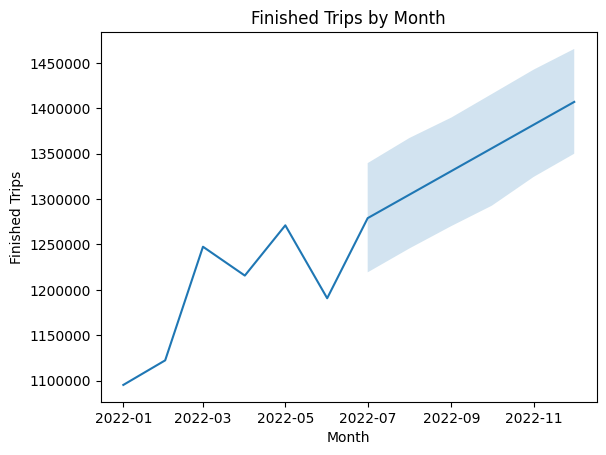

In [163]:
# Create a line chart with the call_date and finished_trips columns from concatenated_df
plt.plot(concatenated_df['call_date'], concatenated_df['finished_trips'])

# Add the upper and lower bounds using the finished_trips_upper and finished_trips_lower columns
plt.fill_between(concatenated_df['call_date'], concatenated_df['finished_trips_lower'], 
                 concatenated_df['finished_trips_upper'], alpha=0.2)

# Add a title to the chart
plt.title('Finished Trips by Month')

# Add labels to the x and y axes
plt.xlabel('Month')
plt.ylabel('Finished Trips')

# Show completed number on y axe
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Display the chart
plt.show()



In [154]:
concatenated_df = concatenated_df.fillna(0)
concatenated_df

,call_date,finished_trips,finished_trips_lower,finished_trips_upper
0,2022-01-01,1095265.00000,0.00000,0.00000
1,2022-02-01,1122323.00000,0.00000,0.00000
2,2022-03-01,1247450.00000,0.00000,0.00000
3,2022-04-01,1215670.00000,0.00000,0.00000
4,2022-05-01,1271018.00000,0.00000,0.00000
5,2022-06-01,1190701.00000,0.00000,0.00000
0,2022-07-01,1278935.93056,1219209.60071,1339522.86370
1,2022-08-01,1304868.94743,1245594.35775,1367244.56048
2,2022-09-01,1330801.96429,1270211.26033,1389718.87266
3,2022-10-01,1355898.43222,1292658.38511,1415639.70691


In [156]:
concatenated_df[['finished_trips', 'finished_trips_lower','finished_trips_upper']] = concatenated_df.round()[[
    'finished_trips', 'finished_trips_lower','finished_trips_upper']].astype(int)
concatenated_df

,call_date,finished_trips,finished_trips_lower,finished_trips_upper
0,2022-01-01,1095265,0,0
1,2022-02-01,1122323,0,0
2,2022-03-01,1247450,0,0
3,2022-04-01,1215670,0,0
4,2022-05-01,1271018,0,0
5,2022-06-01,1190701,0,0
0,2022-07-01,1278936,1219210,1339523
1,2022-08-01,1304869,1245594,1367245
2,2022-09-01,1330802,1270211,1389719
3,2022-10-01,1355898,1292658,1415640


In [149]:
concatenated_df = concatenated_df.reset_index(drop=True)
concatenated_df

,call_date,finished_trips,finished_trips_lower,finished_trips_upper
0,2022-01-01,1095265,0,0
1,2022-02-01,1122323,0,0
2,2022-03-01,1247450,0,0
3,2022-04-01,1215670,0,0
4,2022-05-01,1271018,0,0
5,2022-06-01,1190701,0,0
6,2022-07-01,1278936,1219210,1339523
7,2022-08-01,1304869,1245594,1367245
8,2022-09-01,1330802,1270211,1389719
9,2022-10-01,1355898,1292658,1415640


In [206]:
# Define the number of days to include in each cross-validation fold
horizon = '30 days'

# Define the number of days between each training period
period = '30 days'

# Perform cross-validation on the model using the historical data
df_cv = cross_validation(model, horizon=horizon, period=period)

# Calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = (abs(df_cv['y'] - df_cv['yhat'])).mean()
rmse = ((df_cv['y'] - df_cv['yhat']) ** 2).mean() ** 0.5

  0%|          | 0/2 [00:00<?, ?it/s]09:47:58 - cmdstanpy - INFO - Chain [1] start processing
09:47:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  3.06it/s]09:47:58 - cmdstanpy - INFO - Chain [1] start processing
09:47:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


In [207]:
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 77344.67127760057


In [208]:
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 95980.49268597136


#### Since the forecast for finished trips until the end of December was 15,201,691, the company did not achieve OKR-1. The projection was made based on monthly data of finished trips, forecasting the quantity for the months until the end of the year using the Prophet library. The confidence interval was set at 5%. Due to the small amount of data in our historical records, the error indicators (MAE and RMSE) in the projection were high. Nevertheless, the projection falling short of the company's target prompts us to make suggestions to improve results, such as (1) increasing the supply of drivers in high demand areas to reduce passenger wait time, and (2) implementing promotions to encourage people to travel during off-peak hours.






# 3) In order to improve the completion rate, the company wants to test a new app version and check if it's a successful version. How would you design this experiment? Give a detailed description of the test, and all the possible risks and suggestions for it

#### To test the new app version, the experiment should be designed to compare the performance of the new version against the current one. The experiment should be conducted with a randomly selected group of users, with a sufficient sample size to ensure statistical significance. The experiment should include a control group to measure the difference in performance between the new and old versions.

#### Possible risks of the experiment include user dissatisfaction with the new version, technical issues that may arise during the experiment, and the potential for the new version to negatively impact other areas of the business. To mitigate these risks, the company should monitor user feedback throughout the experiment and be prepared to make adjustments to the new version as needed.

#### In addition, it is important to have a clear objective for the experiment, such as improving completion rate or increasing user engagement, and to measure success based on specific metrics. Finally, the company should be prepared to invest sufficient resources into the experiment, including budget, personnel, and technology, to ensure accurate results and a successful implementation of the new app version.